In [ ]:
import anndata as ad
import seaborn as sns
from matplotlib import pyplot as plt
import scvi
import numpy as np
import pandas as pd
from scipy import sparse
from scipy.stats import median_abs_deviation
import scanpy as sc
import os
import warnings
warnings.filterwarnings('ignore')

Global seed set to 0
/home/usuario/miniconda3/envs/atlas_protocol/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
sc.set_figure_params(dpi=200)

In [ ]:
def process_subcluster(adata):
    sc.pp.neighbors(adata, use_rep = 'X_scANVI', knn=20)
    sc.tl.umap(adata)
    for resolution in [0.5, 1.0, 1.5]:
        sc.tl.leiden(adata, resolution=resolution, key_added=f"leiden{resolution}", random_state=0)

## Carregar o dataset

In [ ]:
adata = ad.read_h5ad("atlas_updated.h5ad")
# Error correction:
adata.uns['log1p']['base'] = None

In [ ]:
adata[adata.obs['annotation_l1'] == 'Myeloid'].obs

In [ ]:
for resolution in [0.5, 1.0, 1.5]:
    sc.tl.leiden(adata, resolution=resolution, key_added=f"leiden{resolution}", random_state=0)

### Checando as predições

In [ ]:
sc.pl.umap(adata, color = 'Condition',  frameon=False, ncols = 2)

In [ ]:
sc.pl.umap(adata, color=['new_predictions'], frameon=False, ncols=1, title='Cell Populations')

In [ ]:
sc.pl.umap(adata, color=['scanvi_labels'], frameon=False, ncols=1, title='Prediction 1')

In [ ]:
sc.pl.umap(adata, color=['coarsed_labels'], frameon=False, ncols=1, title='Prediction 2')

In [ ]:
sc.pl.umap(adata, color=['cell_subtype'], frameon=False, ncols=1, title='Prediction 3')

In [ ]:
sc.pl.umap(adata, color=['cell_type_final'], groups=(['DCs']),frameon=False, ncols=1, title='Prediction 4')

### Batch

In [ ]:
sc.pl.umap(adata, color = ['condition', 'dataset'], frameon=False, ncols = 2)

## Annotation: Main

### Genes

In [ ]:
# EPCAM - Epithelial | SCGB1A1 - Club
# SFTPA2 - AT2 | TPPP3 - Ciliated
# KRT17 - Club | AGER - AT1
epithelial_genes = ['AGER', 'SFTPA2', 'SCGB1A1', 'TPPP3', 'KRT17', 'EPCAM']

lymphoid_genes = ['CD8A', 'CD4', 'KLRD1', 'FOXP3', 'IL2RA', 'CCR7', 'GZMA', 'NKG7',
                  "MS4A1", 'CD79A', 'JCHAIN', 'IGKC', 'IGHA1', "IGHA2", 'IL7R']

myeloid_genes = ['CX3CR1', 'APOE', 'S100A8', 'FABP4', 'CXCL9', 'FCN1', 'KIT', 'GATA2',
                 'HLA-DQA1', 'XCR1', 'CLEC9A', 'FCER1A', 'CD1C', 'TLR1', 'FCGR3B', 'LILRA4']

stromal_genes = ["VWF", "CCL21", "PROX1", "ACTA2","MYH11", "PDGFRB",
                 "UPK3B", "LUM", "PDGFRA", "MYLK", "HAS1"]

### Dotplots

In [ ]:
dotplot_markers = {
    'Lymphoid': lymphoid_genes,
    'Myeloid': myeloid_genes,
}
sc.pl.dotplot(adata, dotplot_markers, 'leiden1.0',
              standard_scale='var',cmap='bwr') # leiden | annotation_l1

In [ ]:
dotplot_markers = {
    'Epithelial': epithelial_genes,
    'Stromal': stromal_genes,
}
sc.pl.dotplot(adata, dotplot_markers, 'leiden1.0',
              standard_scale='var',cmap='bwr') # leiden | annotation_l1

### UMAP

In [ ]:
with plt.rc_context({"figure.figsize": (8, 8), "figure.dpi": (100)}):
    sc.pl.umap(adata, color='leiden1.0', groups=['16', '5', '6', '9', '18', '26'], frameon=False, ncols=2)

In [ ]:
with plt.rc_context({"figure.figsize": (8, 8), "figure.dpi": (400)}):
    sc.pl.umap(adata, color=epithelial_genes, frameon=False, ncols=2)

In [ ]:
with plt.rc_context({"figure.figsize": (8, 8), "figure.dpi": (400)}):
    sc.pl.umap(adata, color=['CD3E', 'CD8A', 'CD4', 'TCF7', ], frameon=False, ncols=2, vmax=3)

In [ ]:
with plt.rc_context({"figure.figsize": (8, 8), "figure.dpi": (400)}):
    sc.pl.umap(adata, color=['JCHAIN', 'CD19', 'MS4A1'], frameon=False, ncols=2)

In [ ]:
with plt.rc_context({"figure.figsize": (8, 8), "figure.dpi": (400)}):
    sc.pl.umap(adata, color=['APOE', 'CD14', 'FCN1', 'S100A8'], frameon=False, ncols=2)

In [ ]:
with plt.rc_context({"figure.figsize": (8, 8), "figure.dpi": (400)}):
    sc.pl.umap(adata, color=['LILRA4', 'LAMP3', 'FCER1A', 'CADM1'], frameon=False, ncols=2)

In [ ]:
l1_types = {
    '0':'Myeloid',
    '1':'Lymphoid',
    '2':'Lymphoid',
    '3':'Myeloid',
    '4':'Lymphoid',
    '5':'Malignant',
    '6':'Malignant',
    '7':'Lymphoid',
    '8':'Myeloid',
    '9':'Malignant',
    '10':'Lymphoid',
    '11':'Myeloid',
    '12':'Lymphoid',
    '13':'Myeloid',
    '14':'Stromal',
    '15':'Myeloid',
    '16':'Malignant',
    '17':'Lymphoid',
    '18':'Epithelial',
    '19':'Stromal',
    '20':'Epithelial',
    '21':'Lymphoid',
    '22':'Myeloid',
    '23':'Lymphoid',
    '24':'Myeloid',
    '25':'Myeloid',
    '26':'Epithelial',
    '27':'Myeloid',
    '28':'Lymphoid',
    '29':'Myeloid',
    '30':'Myeloid',
    '31':'Myeloid',
}

In [ ]:
adata.obs['annotation_l1'] = adata.obs['leiden1.0'].map(l1_types)

In [ ]:
sc.pl.umap(adata, color=['annotation_l1'], frameon=False, ncols=1)

### Saving data

In [ ]:
adata.write_h5ad("atlas_updated.h5ad")

## Subset Myeloid

In [ ]:
subset = adata[adata.obs['annotation_l1'] == 'Myeloid'].copy()
process_subcluster(subset)
subset.shape

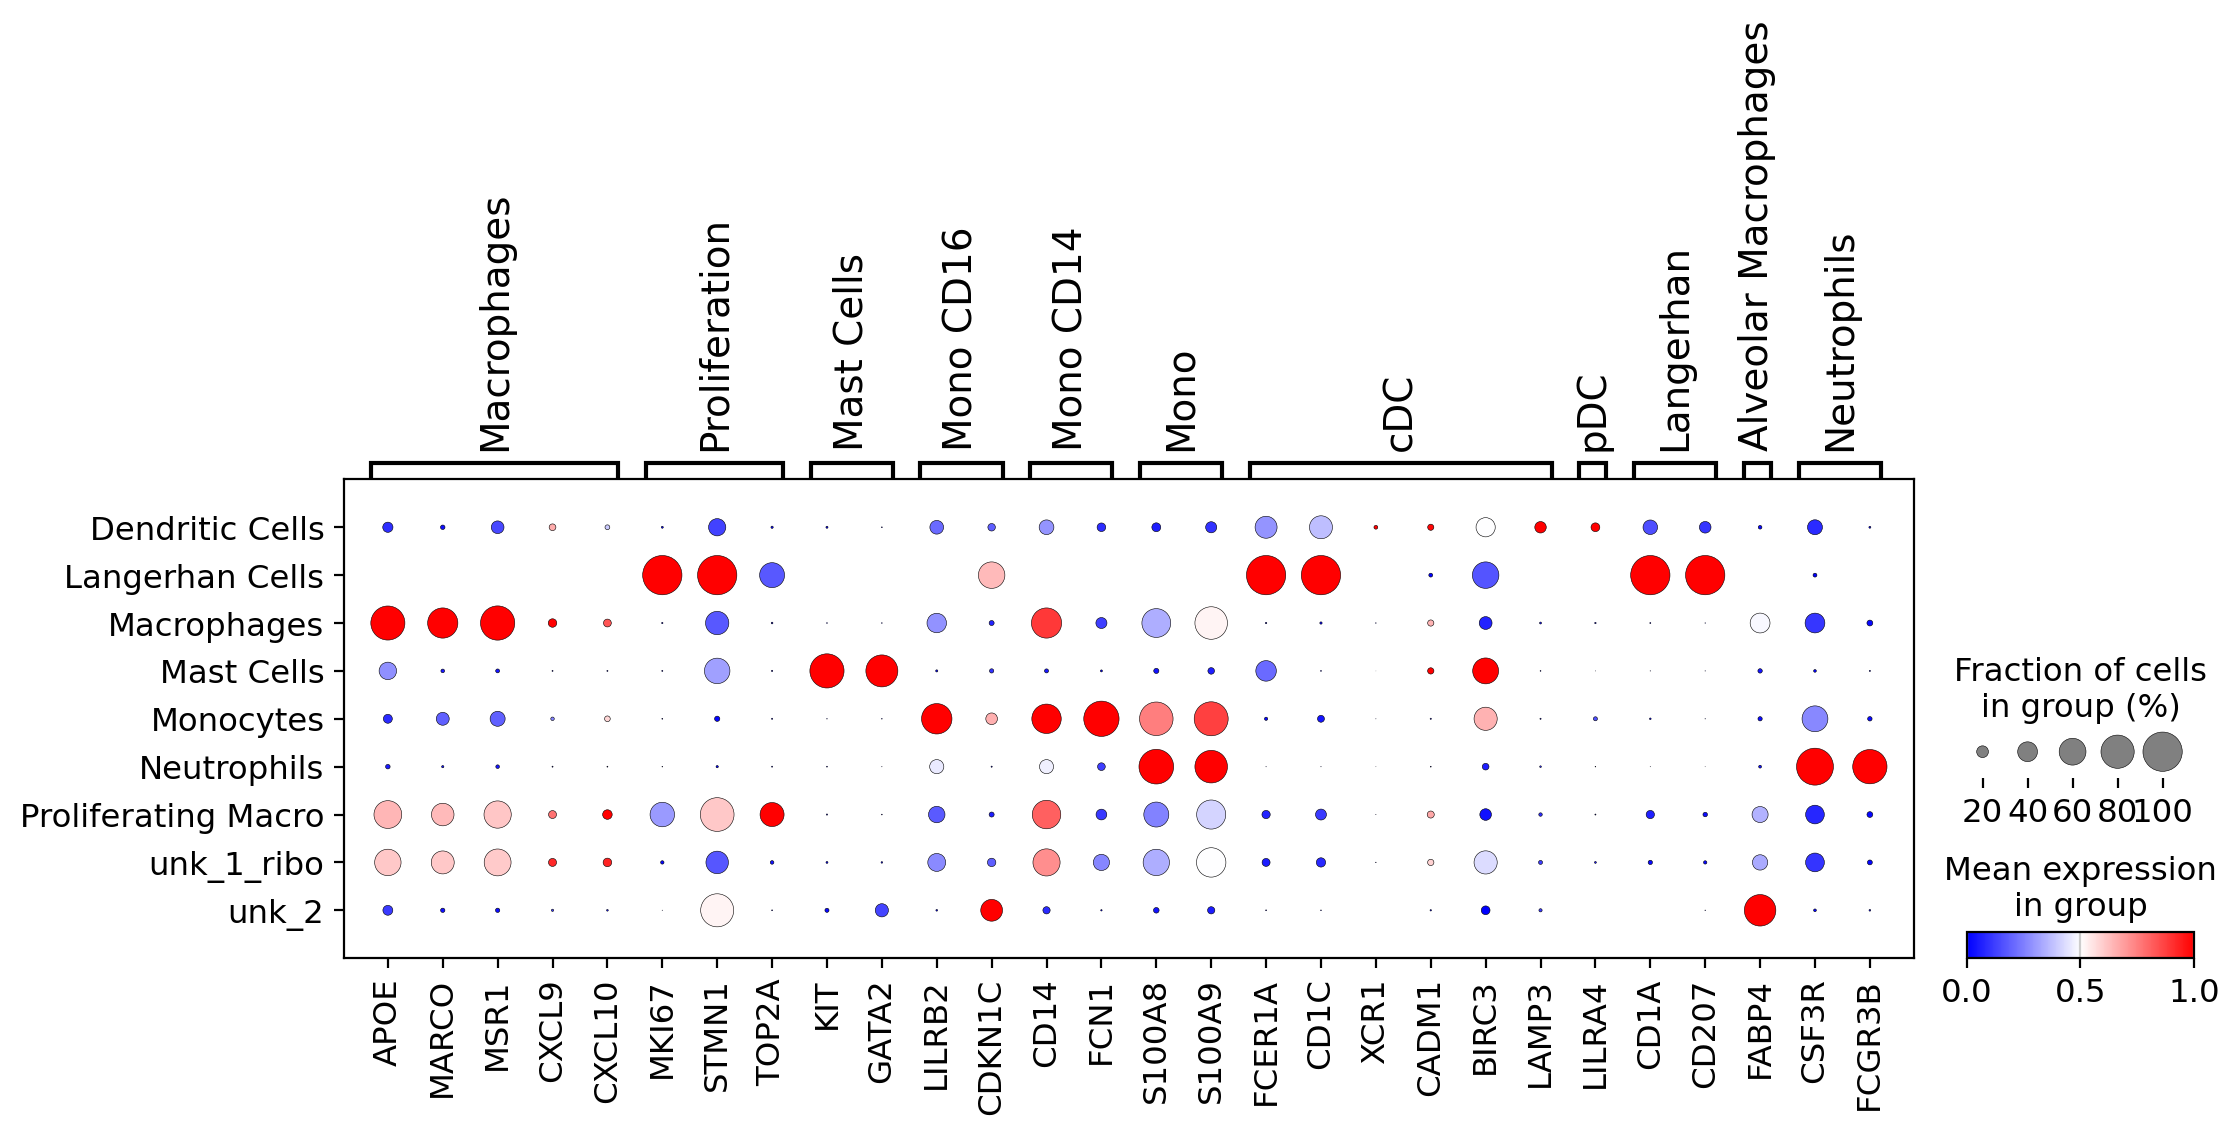

In [ ]:
dotmarkers = {
    'Macrophages':['APOE','MARCO', 'MSR1','CXCL9', 'CXCL10'],
    'Proliferation':['MKI67','STMN1', 'TOP2A'],
    'Mast Cells':['KIT', 'GATA2'],
    'Mono CD16':['LILRB2', 'CDKN1C'], # LACK CD14 & APOE
    'Mono CD14':['CD14','FCN1'], ## LACK APOE
    'Mono':['S100A8','S100A9',],
    'cDC':['FCER1A','CD1C','XCR1','CADM1', 'BIRC3','LAMP3'],
    'pDC':['LILRA4'],
    'Langerhan':['CD1A','CD207'],
    'Alveolar Macrophages':['FABP4'],
    'Neutrophils': ['CSF3R', 'FCGR3B'],
}

sc.pl.dotplot(subset, dotmarkers, 'annotation_l2',
              standard_scale='var',cmap='bwr')

In [ ]:
umapmarkers = ['CD14', 'FCN1', 'APOE', 'MARCO', 'CXCL9', 'MKI67']
sc.pl.umap(subset, color=umapmarkers, frameon=False, vmax=3, ncols=2)

In [ ]:
with plt.rc_context({"figure.figsize": (8, 8), "figure.dpi": (400)}):
    sc.pl.umap(subset, color='leiden1.0',)

In [ ]:
sc.pl.violin(adata, ['CD1C'], groupby='leiden1.0' )

In [ ]:
subset.uns['log1p']['base'] = None
sc.tl.rank_genes_groups(subset, 'annotation_l2')
markers = sc.get.rank_genes_groups_df(subset, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]

In [ ]:
markers[markers['group'] == '9'][:10]

In [ ]:
sc.pl.rank_genes_groups(subset, ncols=2)

In [ ]:
cluster_overlap = sc.tl.marker_gene_overlap(subset, dotmarkers)
cluster_overlap

Dendritic Cells  Langerhan Cells  Macrophages   
Macrophages                       0.0              0.0          3.0  \
Proliferation                     0.0              2.0          0.0   
Mast Cells                        0.0              0.0          0.0   
Mono CD16                         0.0              0.0          0.0   
Mono CD14                         0.0              0.0          0.0   
Mono                              0.0              0.0          0.0   
cDC                               2.0              2.0          0.0   
pDC                               0.0              0.0          0.0   
Langerhan                         0.0              2.0          0.0   
Alveolar Macrophages              0.0              0.0          0.0   
Neutrophils                       0.0              0.0          0.0   

                      Mast Cells  Monocytes  Neutrophils  Proliferating Macro   
Macrophages                  0.0        0.0          0.0                  0.0  \
Proliferation                0.0        0.0          0.0                  3.0   
Mast Cells                   2.0        0.0          0.0                  0.0   
Mono CD16                    0.0        1.0          0.0                  0.0   
Mono CD14                    0.0        1.0          0.0                  0.0   
Mono                         0.0        1.0          2.0                  0.0   
cDC                          0.0        0.0          0.0                  0.0   
pDC                          0.0        0.0          0.0                  0.0   
Langerhan                    0.0        0.0          0.0                  0.0   
Alveolar Macrophages         0.0        0.0          0.0                  0.0   
Neutrophils                  0.0        0.0          2.0                  0.0   

                      unk_1_ribo  unk_2  
Macrophages                  0.0    0.0  
Proliferation                0.0    1.0  
Mast Cells                   0.0    0.0  
Mono CD16                    0.0    0.0  
Mono CD14                    0.0    0.0  
Mono                         0.0    0.0  
cDC                          0.0    0.0  
pDC                          0.0    0.0  
Langerhan                    0.0    0.0  
Alveolar Macrophages         0.0    1.0  
Neutrophils                  0.0    0.0

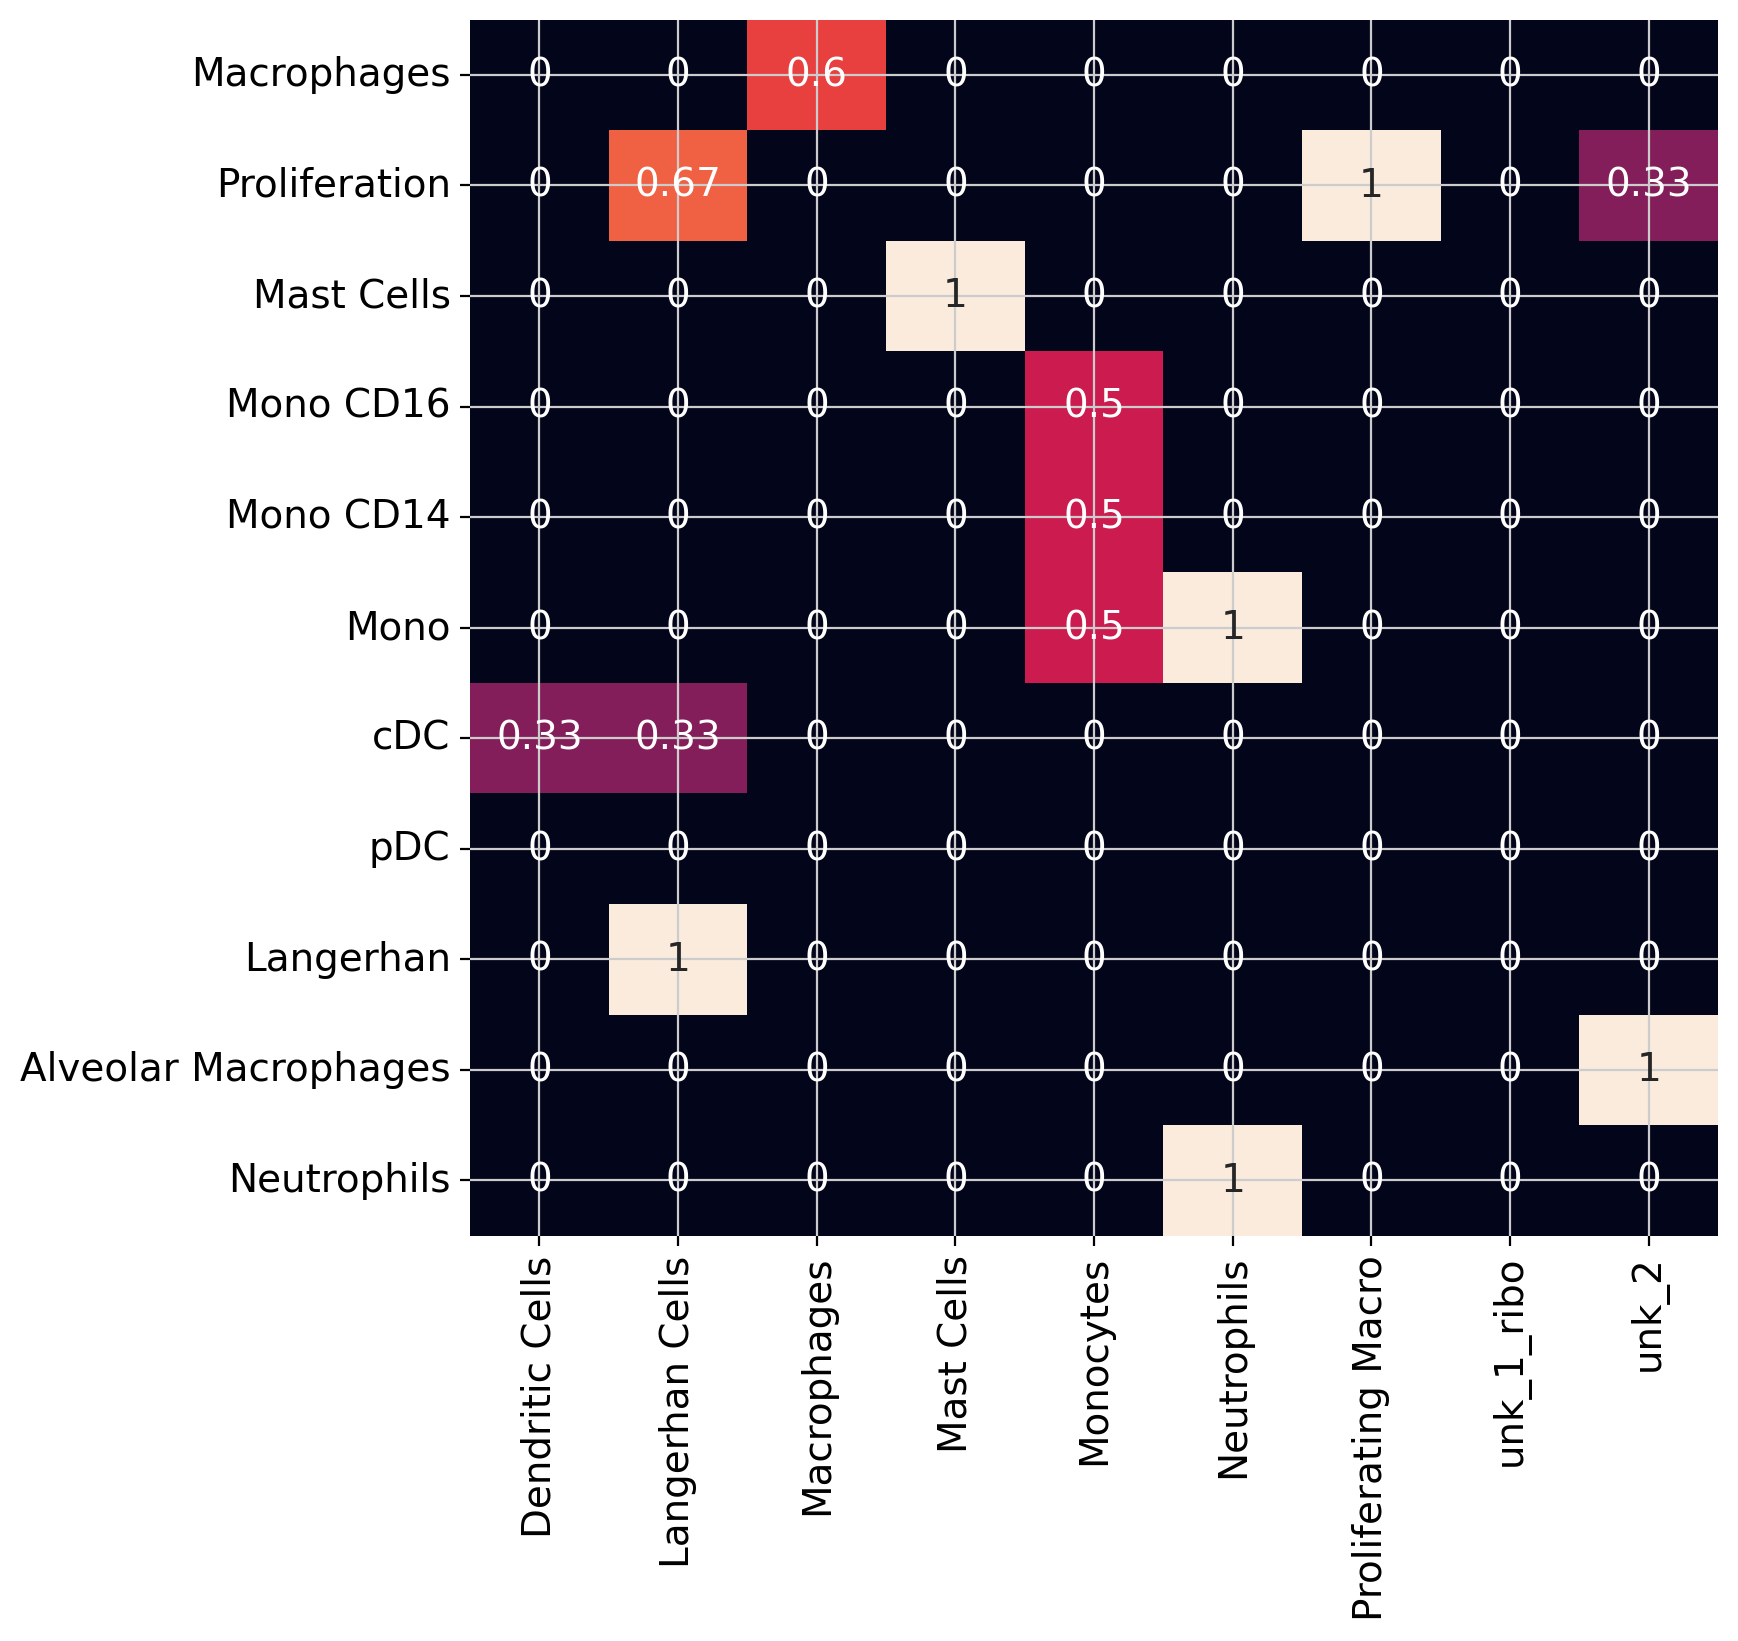

In [ ]:
plt.rcParams['figure.figsize']=(8,8)
cluster_overlap_norm = sc.tl.marker_gene_overlap(subset, dotmarkers, normalize='reference')
sb.heatmap(cluster_overlap_norm, cbar=False, annot=True)
plt.show()

In [ ]:
markers.head()

In [ ]:
cluster_type = {'0':'Macrophages',
                '1':'Neutrophils',
                '2':'Macrophages',
                '3':'Monocytes',
                '4':'Macrophages',
                '5':'Mast Cells',
                '6':'Macrophages',
                '7':'Macrophages',
                '8':'Macrophages',
                '9':'Dendritic Cells',
                '10':'Proliferating Macro',
                '11':'Macrophages',
                '12':'Neutrophils',
                '13':'Neutrophils',
                '14':'Macrophages',
                '15':'Monocytes',
                '16':'Macrophages',
                '17':'Macrophages',
                '18':'Mast Cells',
                '19':'Dendritic Cells',
                '20':'Neutrophils',
                '21':'Dendritic Cells',
                '22':'Dendritic Cells',
                '23':'unk_myeloid_2',
                '24':'Macrophages',
                '25':'Macrophages',
                '26':'Macrophages',
                '27':'Monocytes',
                '28':'Langerhan Cells',
}

subset.obs['annotation_l2'] = subset.obs['leiden1.0'].map(cluster_type)

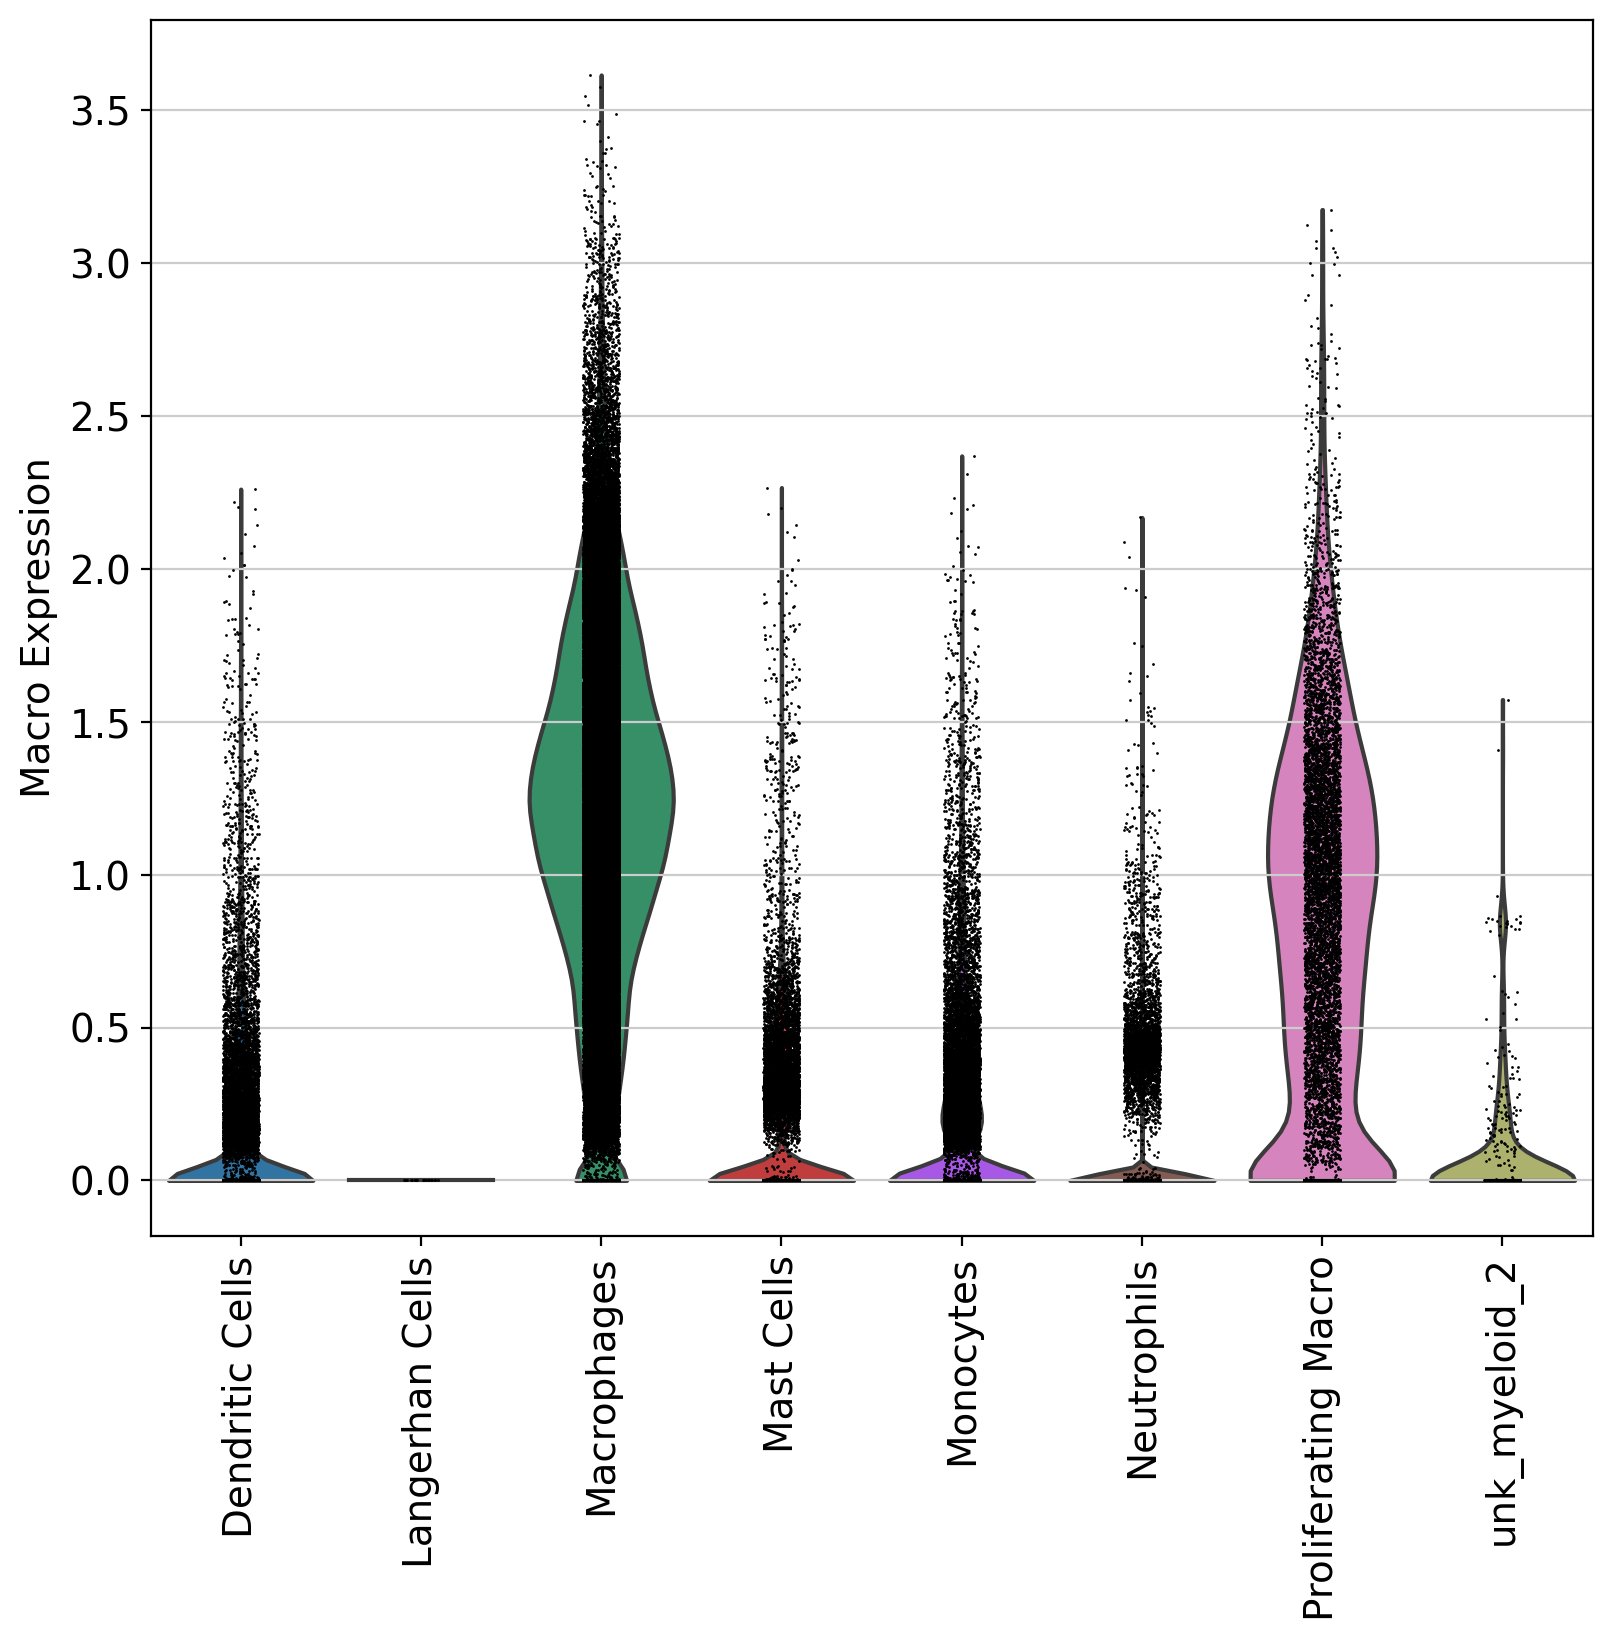

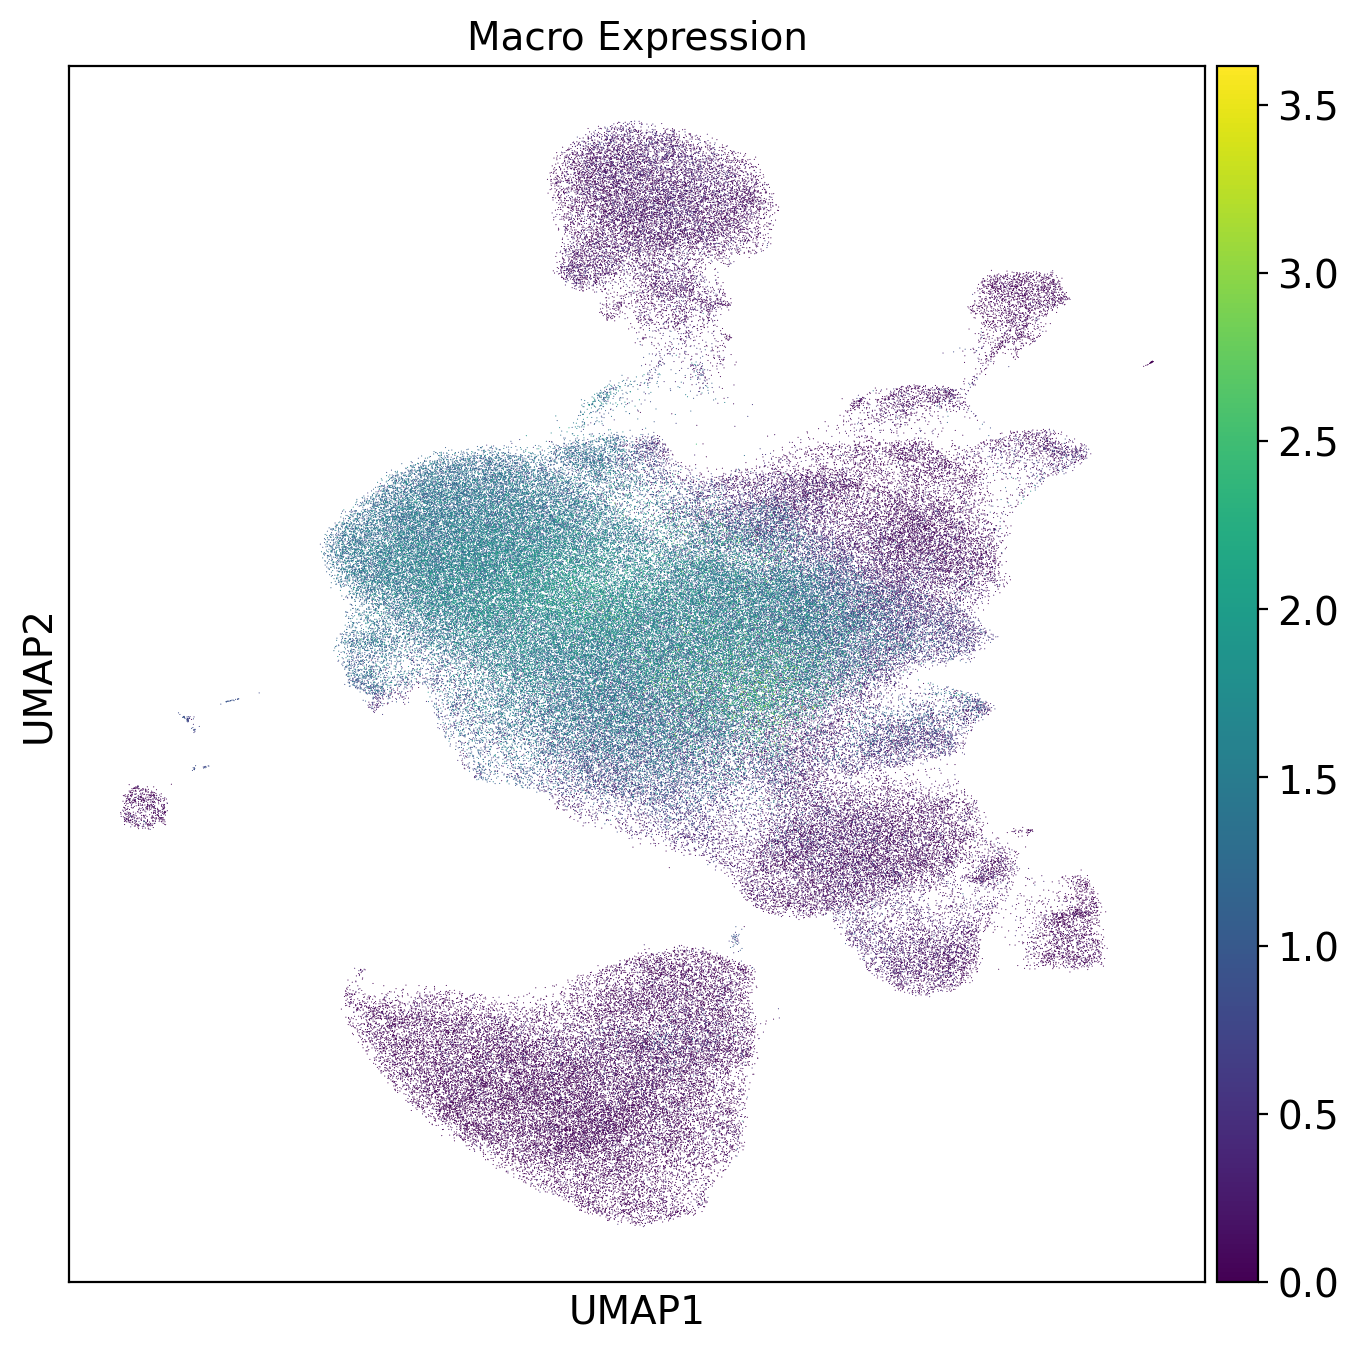

In [ ]:
# Em nosso exemplo, marker_genes == myeloid_markers
ids_macro = np.in1d(subset.var_names, dotmarkers['Macrophages'])

subset.obs['Macro Expression'] = subset.X[:,ids_macro].mean(1)

sc.pl.violin(subset, 'Macro Expression', groupby='annotation_l2',rotation=90)
sc.pl.umap(subset, color='Macro Expression')

In [ ]:
sc.pl.umap(subset, color='annotation_l2',)

In [ ]:
myeloid = subset
myeloid.write('myeloid.h5ad')
del myeloid

In [ ]:
subset = sc.read_h5ad('myeloid.h5ad')

## Subset Lymphoid

In [ ]:
lymphoid = adata[adata.obs['annotation_l1'] == 'Lymphoid'].copy()
process_subcluster(lymphoid)
lymphoid.shape

In [ ]:
sc.pl.umap(lymphoid, color='annotation_l1', title='Lymphoid', frameon=False)

In [ ]:
lymphoid_markers = {
    'TCD4':['CD4','CD3E','CD3D'],
    'TCD8':['CD8A','CD8B'],
    'NK':['NKG7','TRDC', 'GNLY'],
    'Proliferation':['MKI67', 'CDK1', 'TOP2A'],
    'B cells':['CD79A','CD19','MS4A1'],
    'Plasma cells':['JCHAIN', 'MZB1'], # MZB1
}

sc.pl.dotplot(lymphoid, lymphoid_markers, 'leiden1.0',
              standard_scale='var',cmap='bwr')

In [ ]:
sc.pl.umap(lymphoid, color='leiden1.0', frameon='False')

In [ ]:
cluster_type = {'0':'TCD4',
                '1':'TCD8',
                '2':'TCD4',
                '3':'TCD4',
                '4':'TCD8',
                '5':'B Cells',
                '6':'NK',
                '7':'Plasma Cells',
                '8':'NK',
                '9':'TCD8',
                '10':'TCD4',
                '11':'Proliferation',
                '12':'B Cells',
                '13':'Proliferation',
                '14':'Proliferation',

}
lymphoid.obs['annotation_l2'] = lymphoid.obs['leiden1.0'].map(cluster_type)

In [ ]:
sc.pl.umap(lymphoid, color=['annotation_l2'], frameon='False')

In [ ]:
sc.pl.umap(lymphoid, color=['dataset'])
sc.pl.umap(lymphoid, color=['condition'])


In [ ]:
sc.pl.umap(lymphoid, color=['CD4','CD3E','CD3D','CD8A','CD8B','NCAM1'], ncols=2, frameon='false')

In [ ]:
sc.pl.umap(lymphoid, color=['NCAM1', 'FCGR3A'], ncols=2, frameon='false', vmax=1)

In [ ]:
sc.pl.umap(lymphoid, color='leiden1.0', groups=['0','9'], size=2, color=)

In [ ]:
sc.pl.umap(lymphoid, color='dataset', groups=['Zhu_2022'], size=2)

In [ ]:
lymphoid.uns['log1p']['base'] = None
sc.tl.rank_genes_groups(lymphoid, 'leiden1.0', method='wilcoxon')
markers = sc.get.rank_genes_groups_df(lymphoid, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]

In [ ]:
markers[markers['group'] == '9'][:10]

In [ ]:
lymphoid.write('lymphoid.h5ad')

## Integrating the annotation to the main atlas file

In [ ]:
adata.obs['annotation_l2'] = adata.obs['annotation_l1'].astype(str)
adata.obs['annotation_l2'].update(dcs.obs['annotation_l2'])

In [ ]:
adata.obs['annotation_l2'] = adata.obs['annotation_l2'].astype(str)
adata.obs['annotation_l3'].update(dcs.obs['annotation_l3'])

## Subset Stromal

<p style='font-size: 20px'>Aqui recortamos e processamos os neighbors e leiden do subset, para melhor precisão da clusterização.</p>

In [ ]:
subset = adata[adata.obs['annotation_l1'] == 'Stromal'].copy()
process_subcluster(subset)
subset.shape

(23143, 5000)

<p style='font-size: 20px'>Plot do leiden.</p>

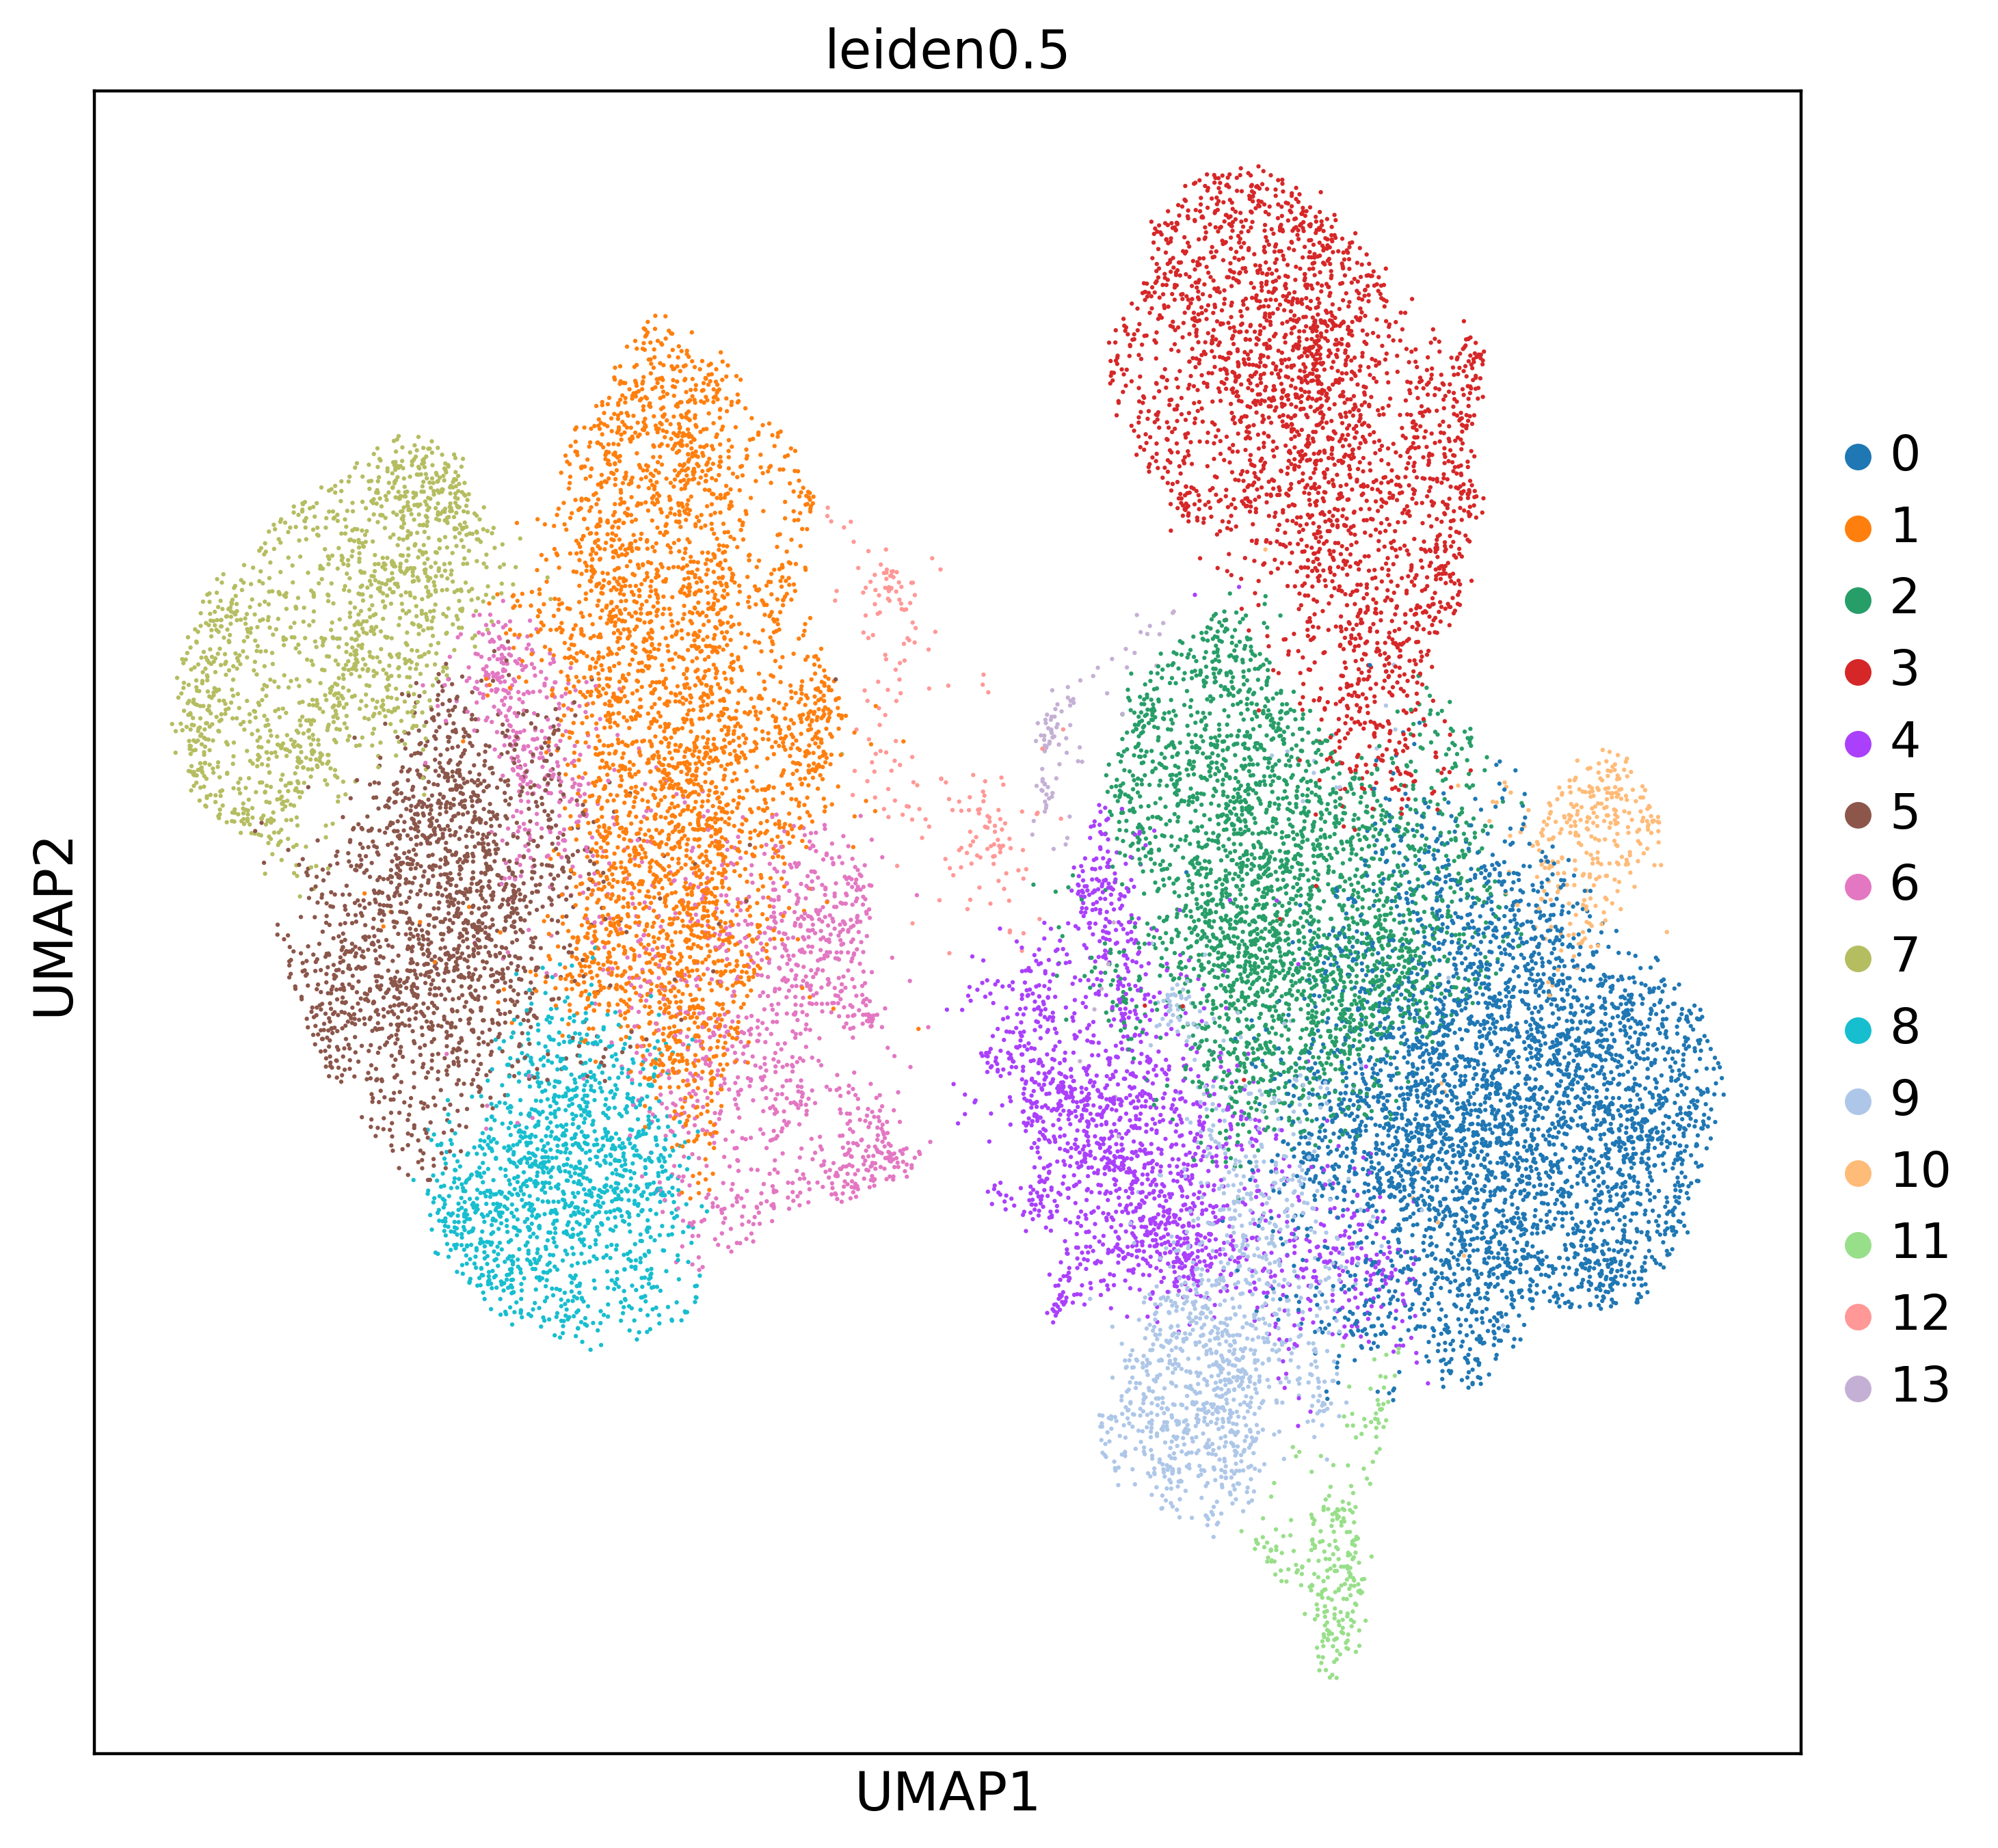

In [ ]:
with plt.rc_context({"figure.figsize": (8, 8), "figure.dpi": (400)}):
    sc.pl.umap(subset, color='annotation_l2',)

<p style='font-size: 20px'>Marcadores e dotplot, com exemplo de mieloides.

In [ ]:
stromal_markers = {
    'Endothelial':['VWF','PECAM1', 'KDR', 'VEGFR'],
    'Lymphatic Endothelial':['PROX1','CCL21', 'LYVE1'],
    'Fibroblast':['LUM','PDGFRA', 'COL1A2', 'GPC3', 'SERPINF1', 'APOE', 'FST'],
    'Myofibroblast':['MYLK', 'ASPN', 'WIF1'],
    'Smooth Muscle':['ACTA2','MYH11', 'CNN1', 'ACTG2'],
    'Mesothelial':['UPK3B','WT1'],
    'AT1':['AGER','PDPN','CAV1','EPCAM'],
}

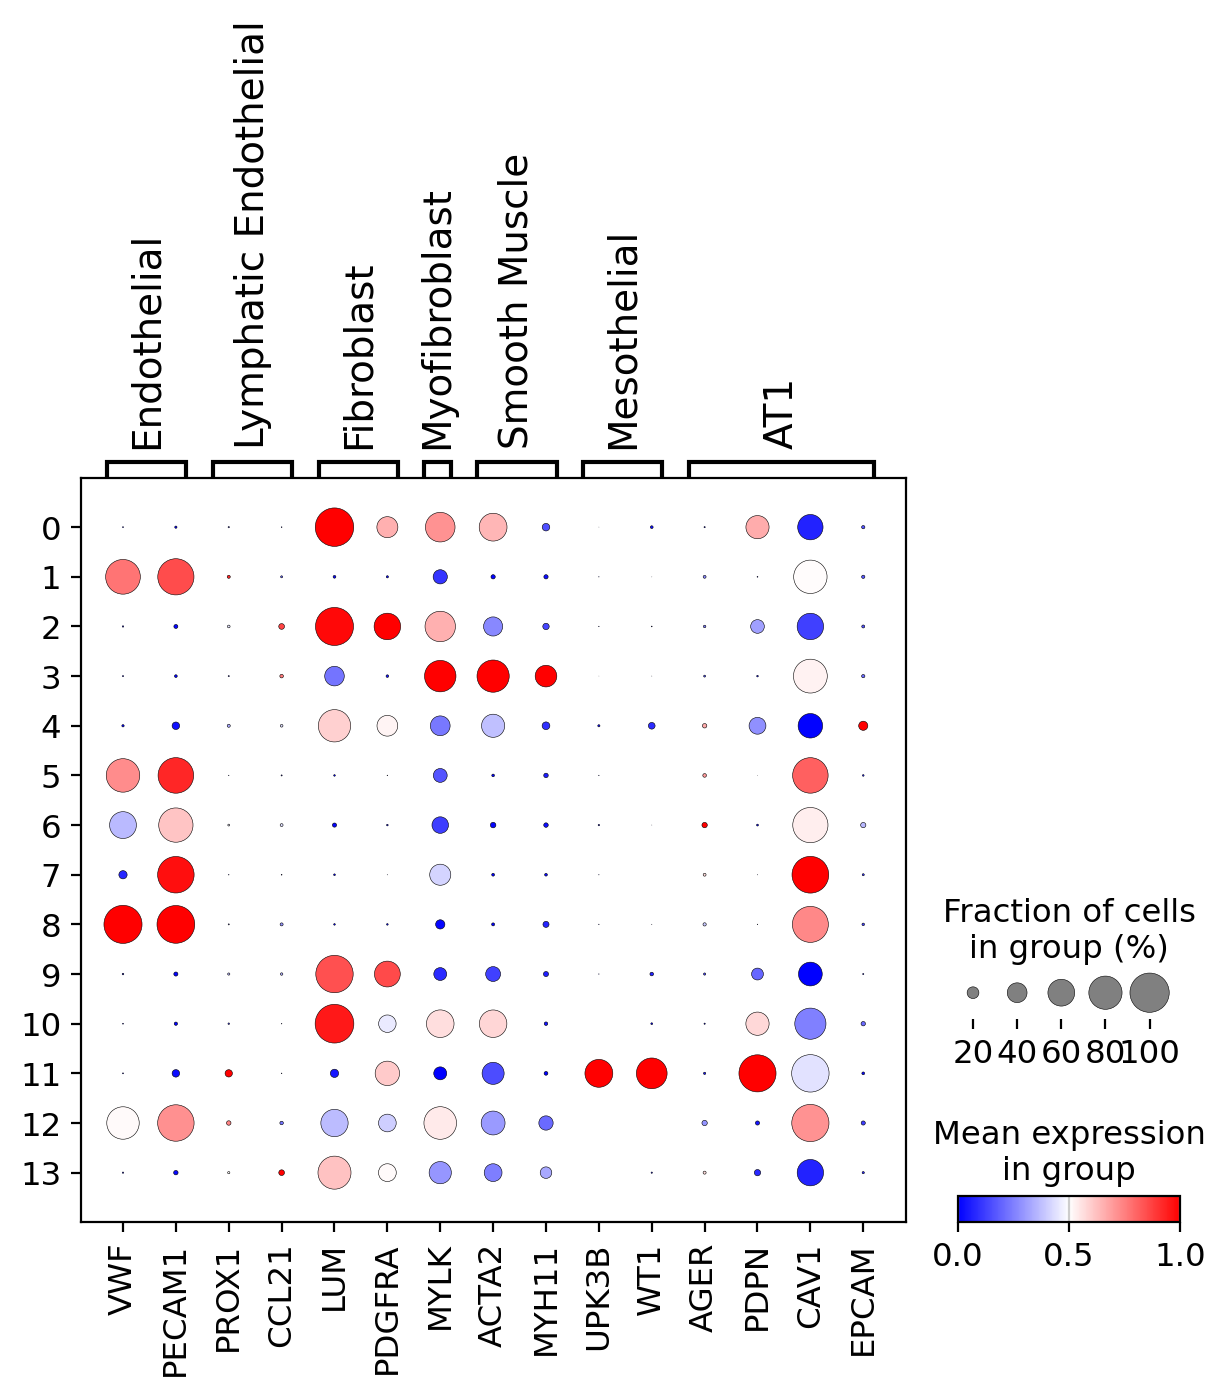

In [ ]:
sc.pl.dotplot(subset, stromal_markers, 'leiden0.5',
              standard_scale='var',cmap='bwr')

<p style='font-size: 20px'>Umaps auxiliares para genes e n_counts, se quisermos detectar doublets.</p>

In [ ]:
umapmarkers = ['CD14', 'FCN1', 'APOE', 'MARCO', 'CXCL9', 'MKI67']
with plt.rc_context({"figure.figsize": (8, 8), "figure.dpi": (400)}):
    sc.pl.umap(subset, color=umapmarkers, frameon=False, vmax=3, ncols=2)

<p style='font-size: 20px'>Aqui calculamos os genes diferenciais de cada dataset, dos quais usaremos nas próximas funções.</p>

In [ ]:
subset.uns['log1p']['base'] = None
sc.tl.rank_genes_groups(subset, groupby='leiden0.5')
markers = sc.get.rank_genes_groups_df(subset, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]

<p style='font-size: 20px'>Observe que usando 'group', vemos o score para os genes diferenciais de cada cluster. Com 'name', vemos o score entre os clusters para o gene dado.</p>

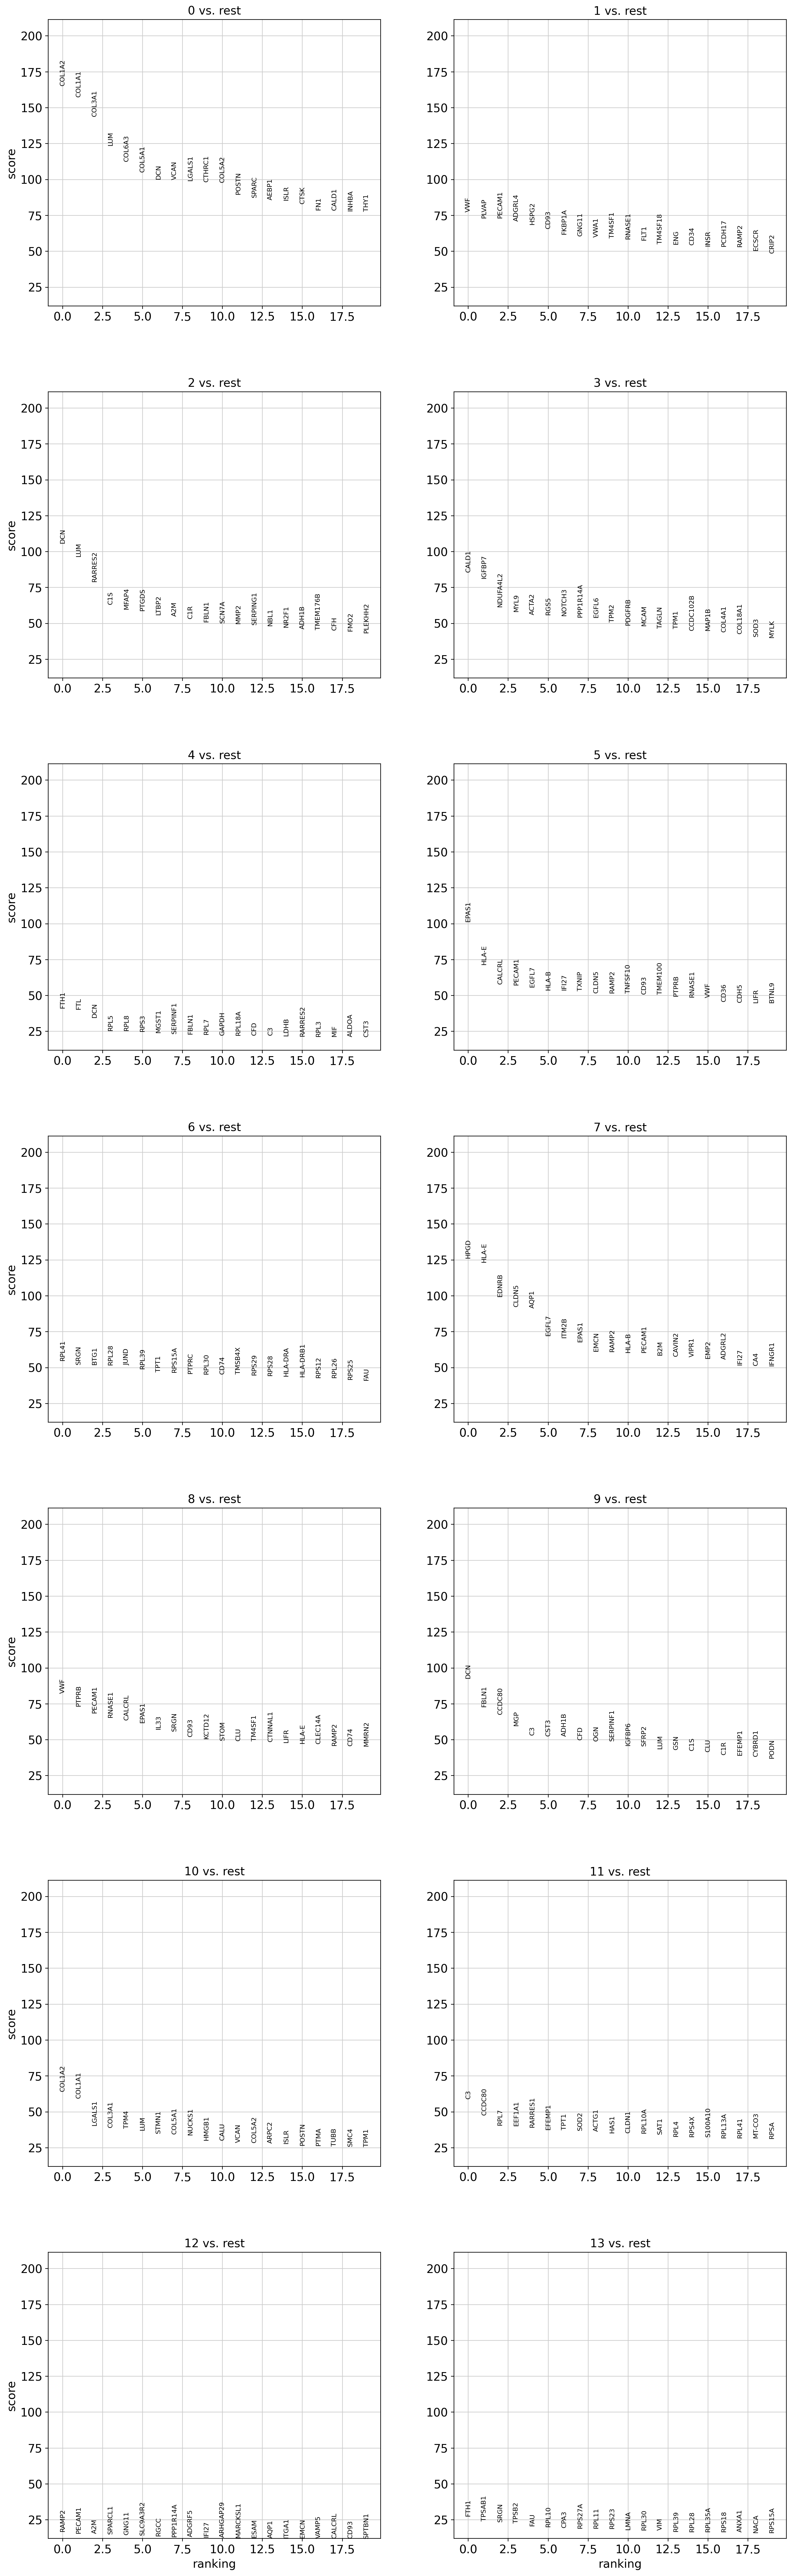

In [ ]:
sc.pl.rank_genes_groups(subset, ncols=2)

In [ ]:
markers[markers['group'] == '9'][:10]

In [ ]:
markers[markers['name'] == 'CD4'][:10]

<p style='font-size: 20px'>Aqui calculamos e exibimos um score dos clusters com base nos marcadores definidos.</p>

In [ ]:
cluster_overlap = sc.tl.marker_gene_overlap(subset, stromal_markers)
cluster_overlap

0    1    2    3    4    5    6    7    8    9   10   
Endothelial            0.0  2.0  0.0  0.0  0.0  2.0  0.0  1.0  2.0  0.0  0.0  \
Lymphatic Endothelial  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Fibroblast             1.0  0.0  2.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0   
Myofibroblast          0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Smooth Muscle          0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Mesothelial            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AT1                    1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0   

                        11   12   13  
Endothelial            0.0  2.0  0.0  
Lymphatic Endothelial  0.0  0.0  0.0  
Fibroblast             0.0  0.0  0.0  
Myofibroblast          0.0  0.0  0.0  
Smooth Muscle          0.0  0.0  0.0  
Mesothelial            0.0  0.0  0.0  
AT1                    1.0  1.0  0.0

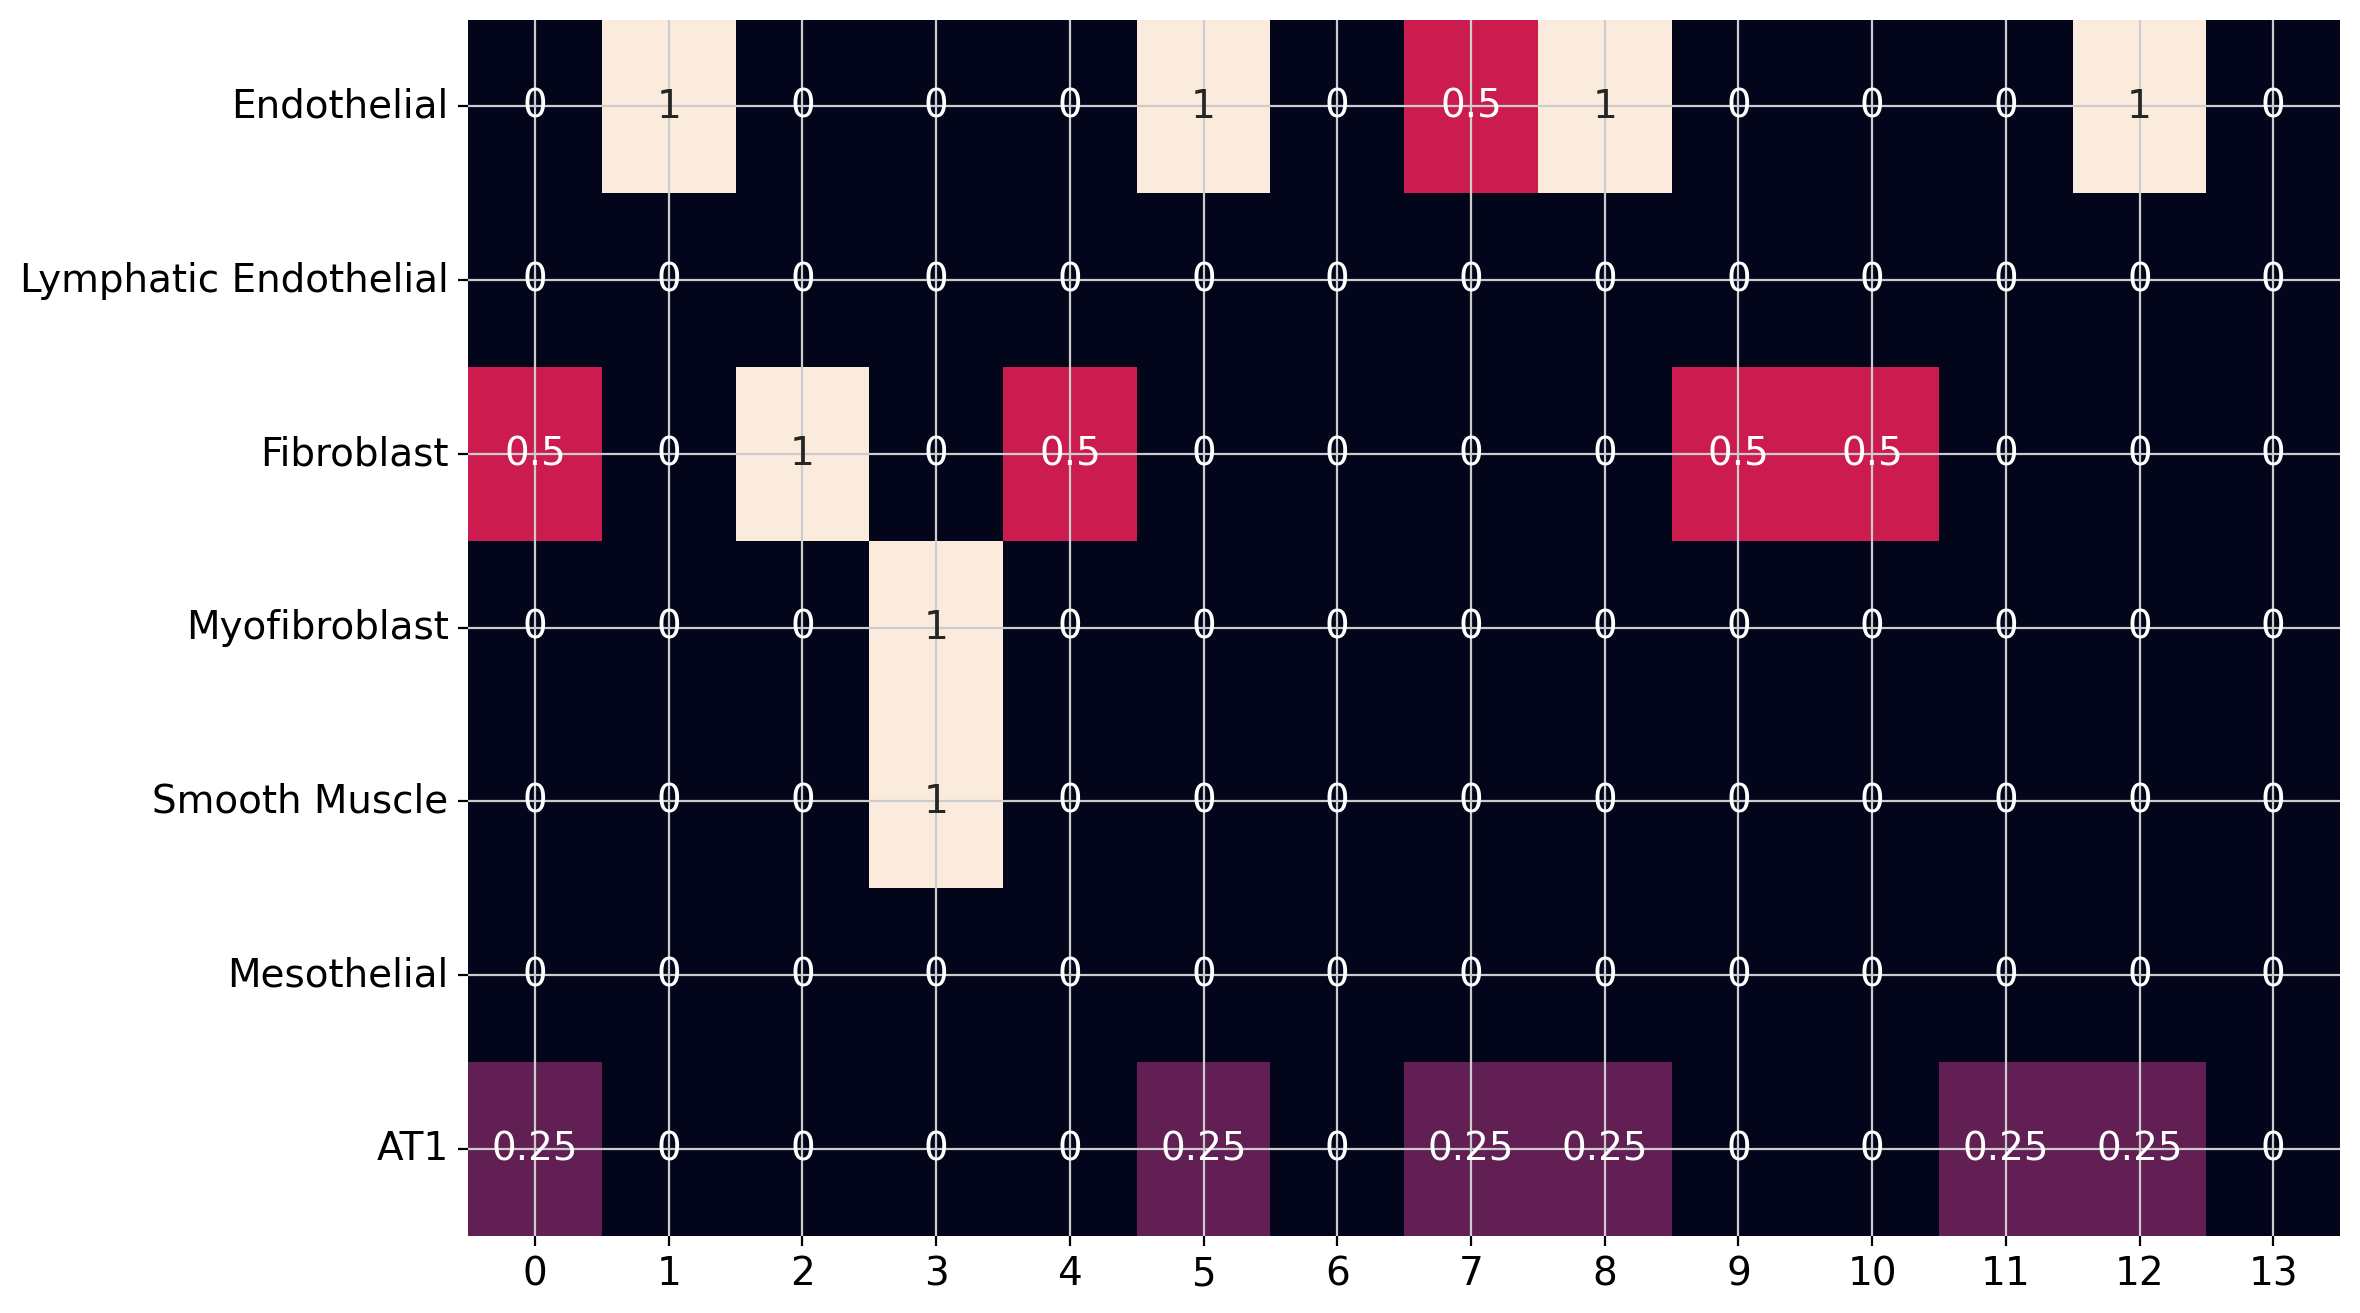

In [ ]:
plt.rcParams['figure.figsize']=(12,8)
cluster_overlap_norm = sc.tl.marker_gene_overlap(subset, stromal_markers, normalize='reference')
sb.heatmap(cluster_overlap_norm, cbar=False, annot=True)
plt.show()

<p style='font-size: 20px'>Violin plot pelo score de expressão dos marcadores.</p>

In [ ]:
del subset.obs['Fibro_Myofibro_SMuscle']

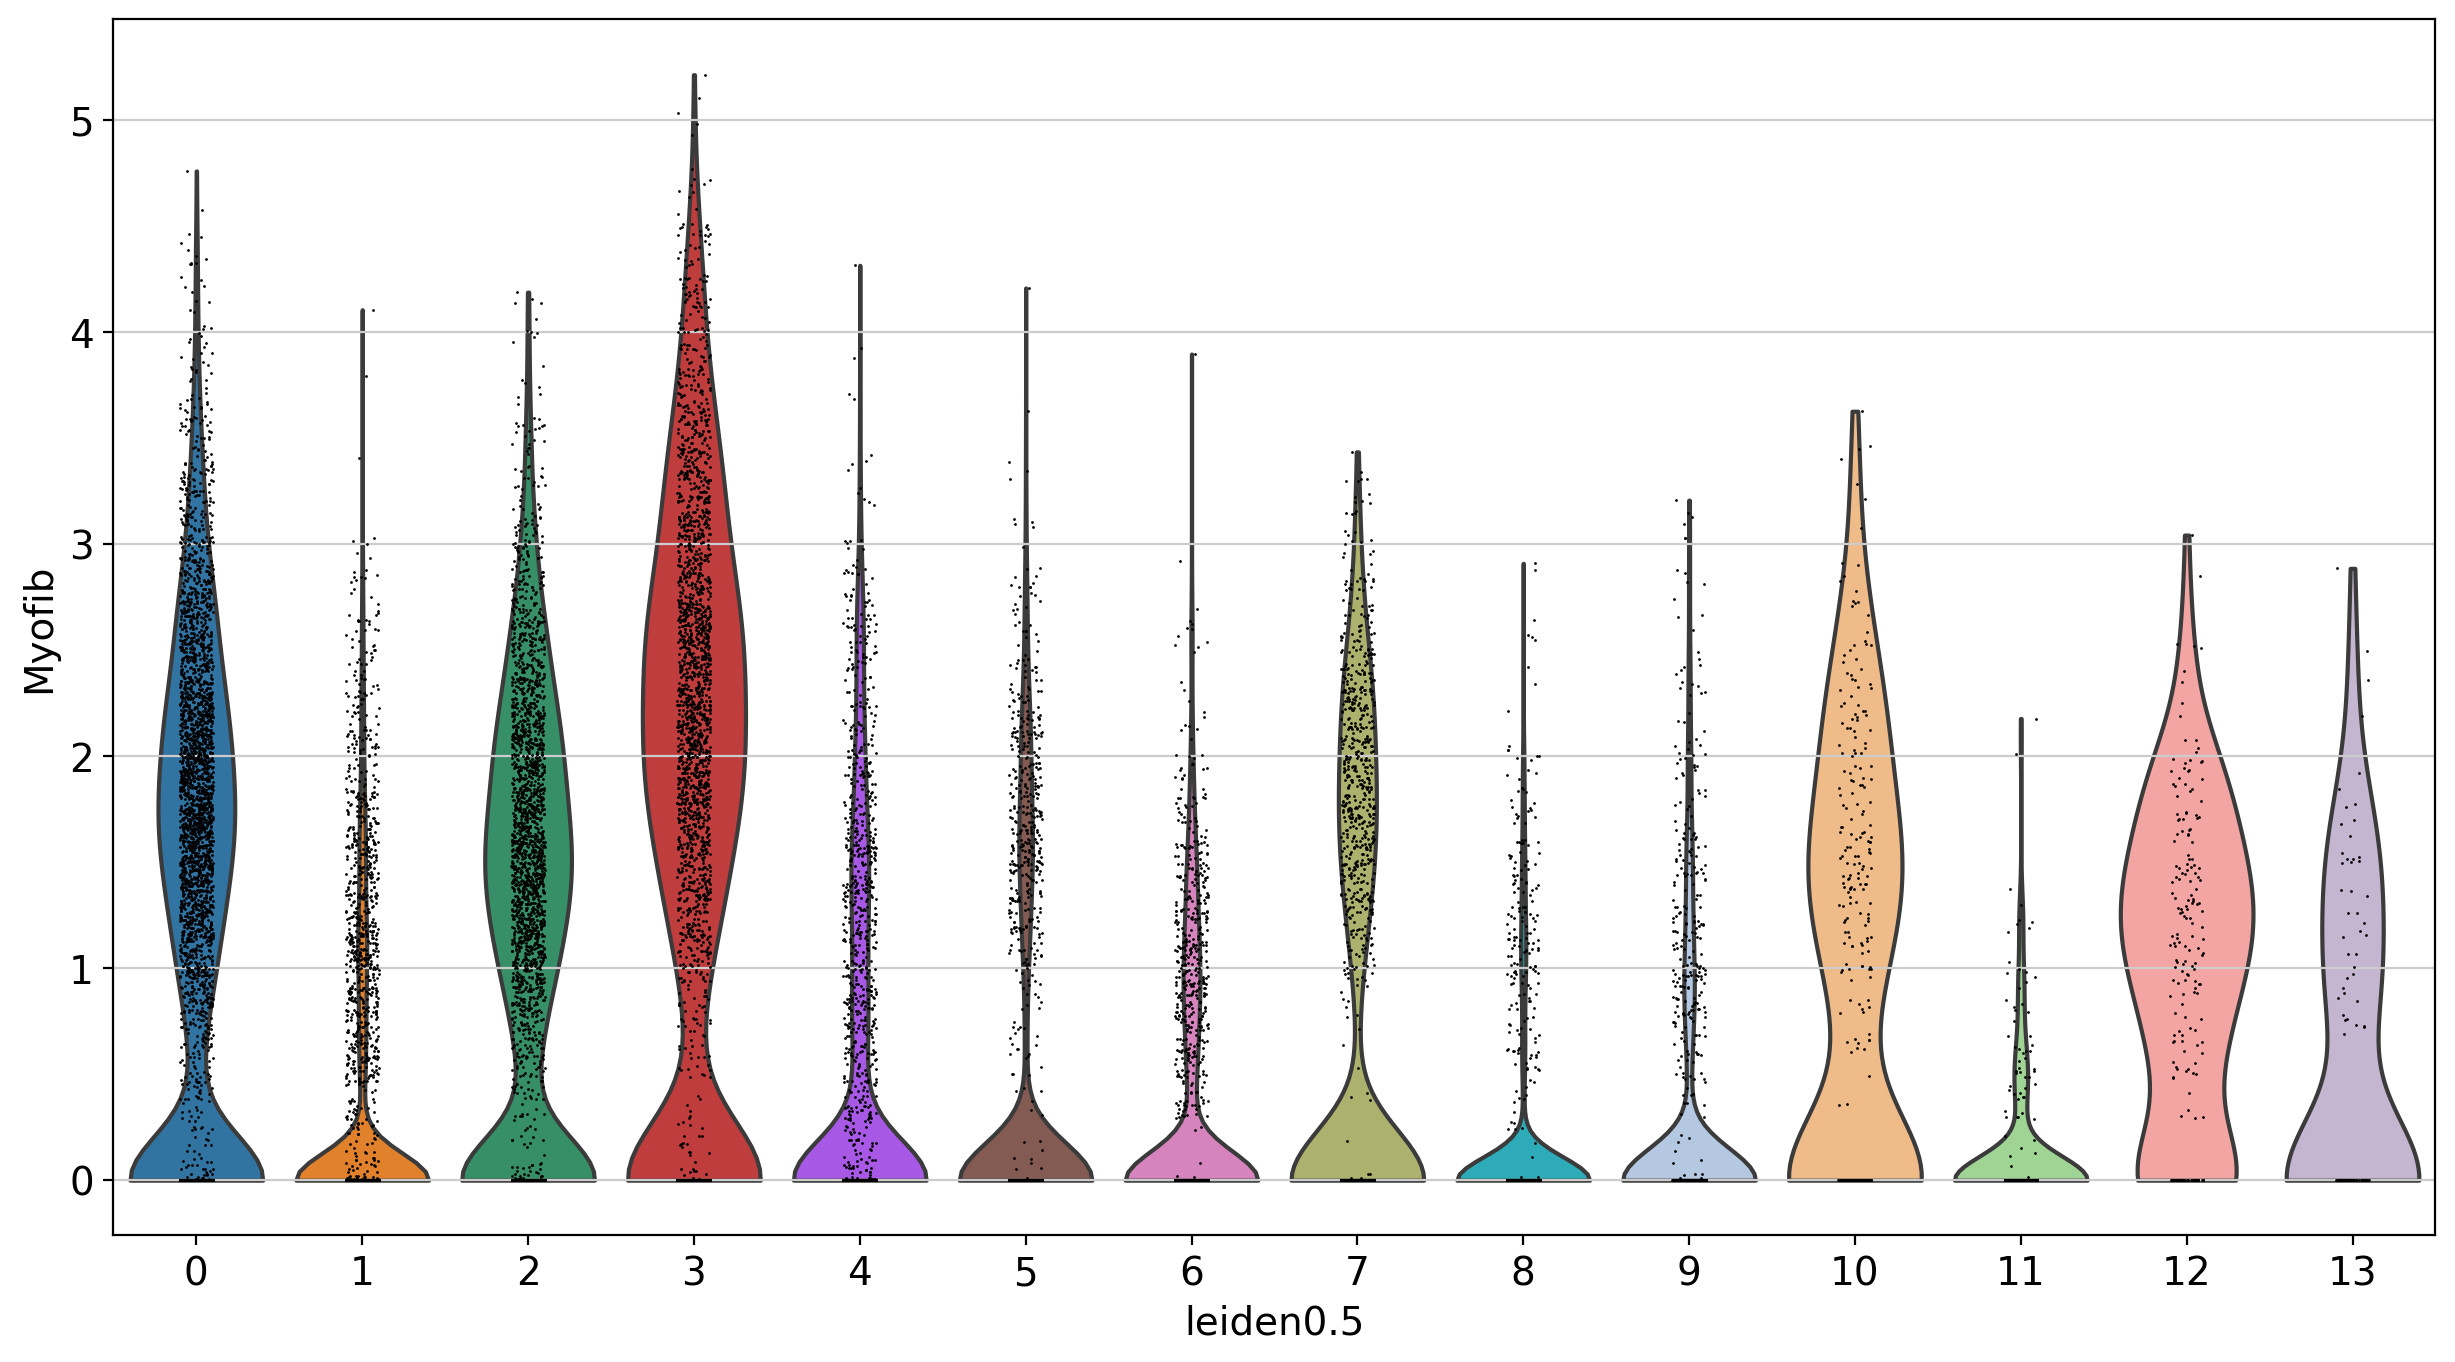

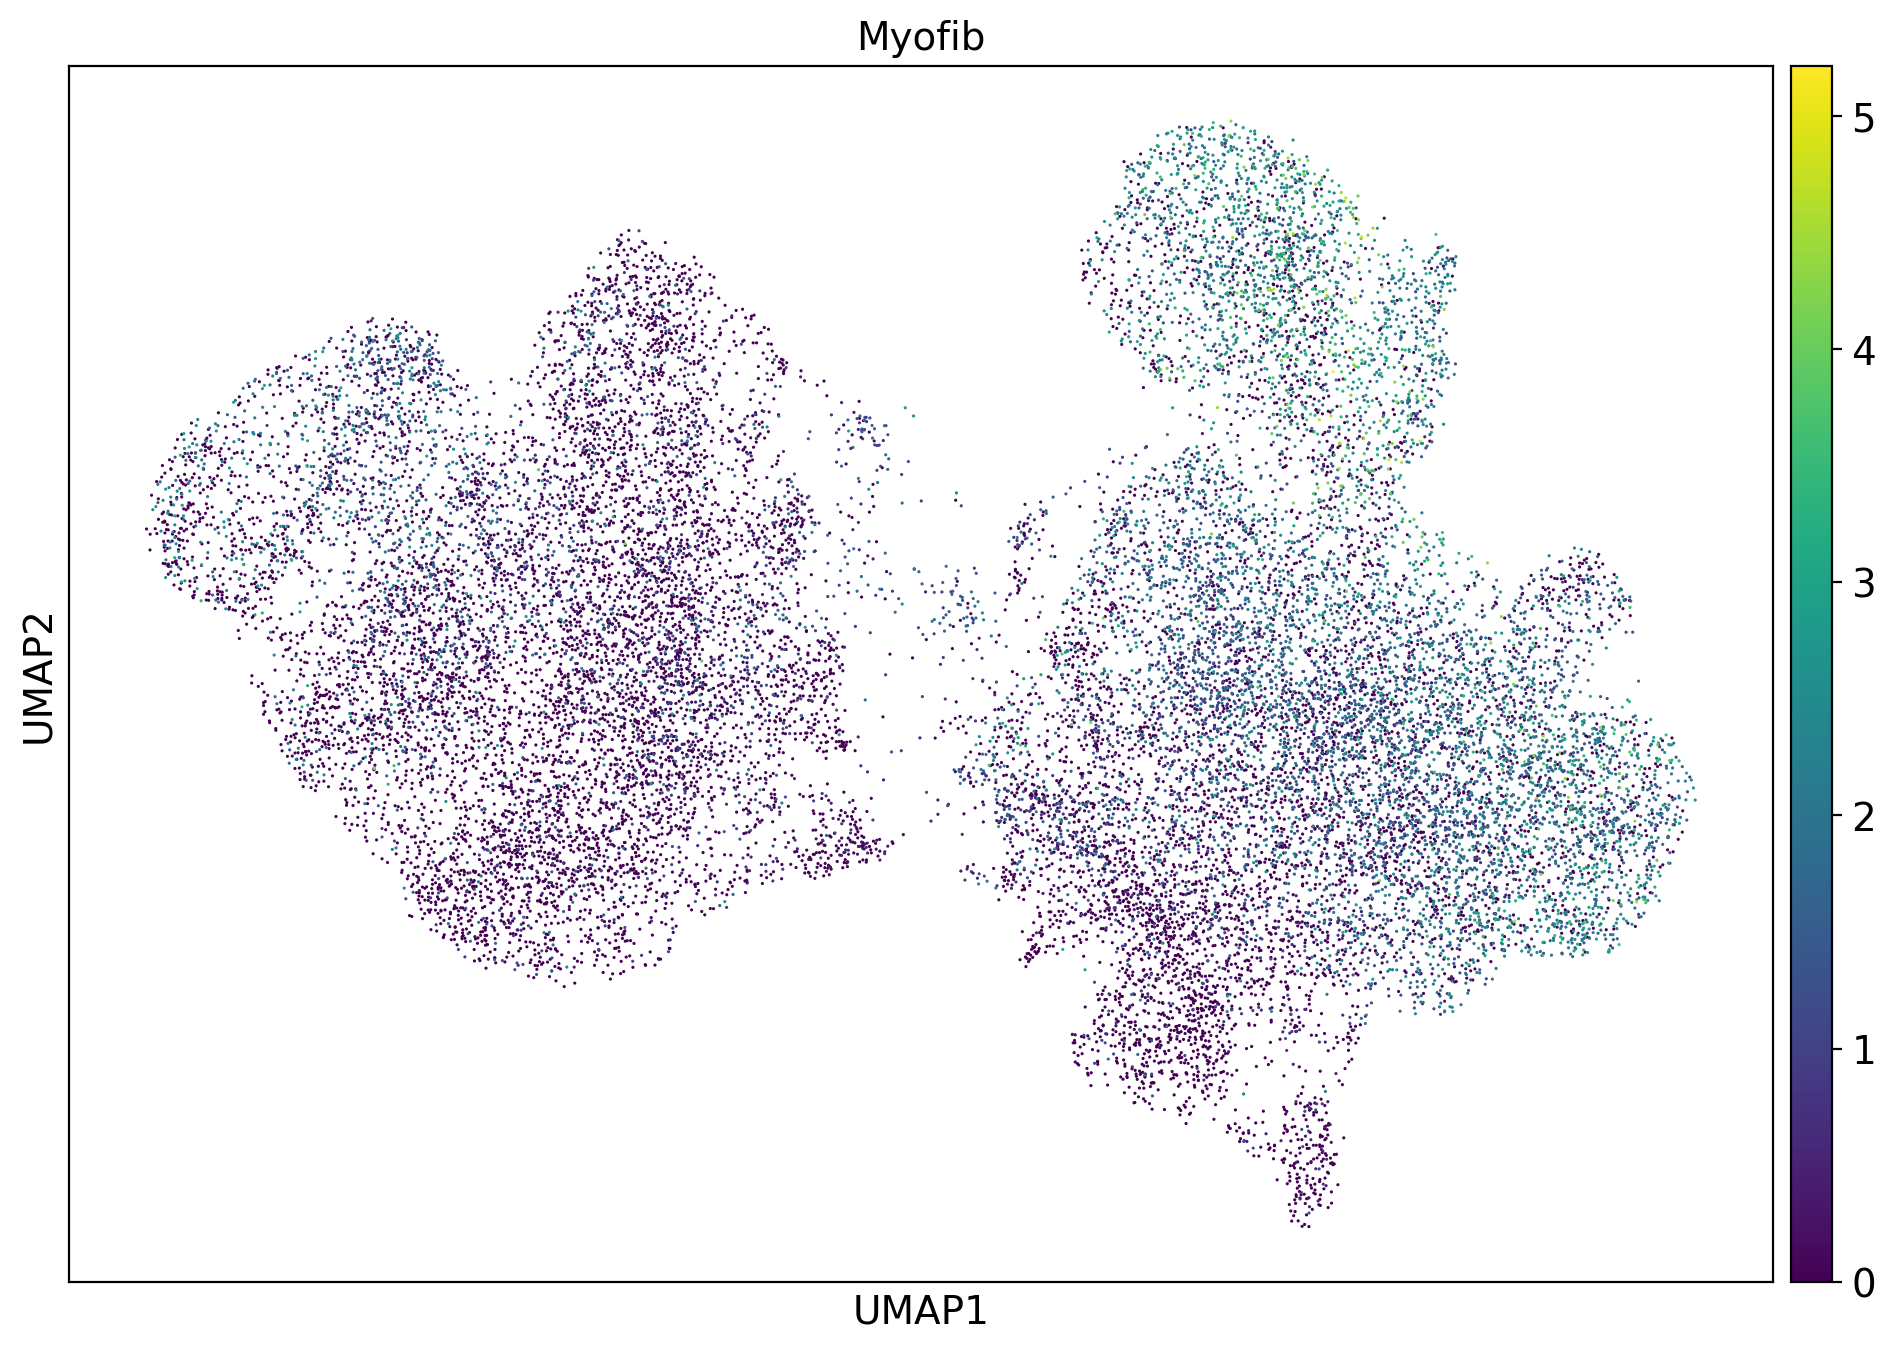

In [ ]:
# Em nosso exemplo, marker_genes == myeloid_markers
ids_1 = np.in1d(subset.var_names, stromal_markers['Fibroblast'])
ids_2 = np.in1d(subset.var_names, stromal_markers['Myofibroblast'])
ids_3 = np.in1d(subset.var_names, stromal_markers['Smooth Muscle'])
ids_final = ids_2# p.logical_or(ids_1, ids_2, ids_3)

subset.obs['Myofib'] = subset.X[:,ids_final].mean(1)

sc.pl.violin(subset, 'Myofib', groupby='leiden0.5')
sc.pl.umap(subset, color='Myofib')

<p style='font-size: 20px'>Violin plot pelo score de expressão dos marcadores.</p>

In [ ]:
#Early enterocyte marker - Arg2
sc.pl.umap(subset, color='Arg2', use_raw=False, color_map=mymap)

sc.pl.violin(adata, groupby='louvain_r0.5', keys='Arg2', use_raw=False)

sc.pl.diffmap(adata, components=['6,9'], color='Arg2', use_raw=False, color_map=mymap)
sc.pl.diffmap(adata, components=['6,9'], color='louvain_r0.5')

<p style='font-size: 20px'>Aqui plotamos os genes diferenciais na forma de linha.</p>

In [ ]:
sc.pl.rank_genes_groups(subset, ncols=2)

<p style='font-size: 20px'>Anotação.</p>

In [ ]:
for i in range(0,14):
    print(f"'{i}':'{i}',")

In [ ]:
annotation = {
'0':'0',
'1':'Endothelial',
'2':'2',
'3':'3',
'4':'4',
'5':'Endothelial',
'6':'6',
'7':'7',
'8':'Endothelial',
'9':'9',
'10':'10',
'11':'11',
'12':'12',
'13':'13',
}

subset.obs['annotation_l2'] = subset.obs['leiden0.5'].map(annotation)

In [ ]:
sc.pl.umap(subset, color='annotation_l2',)

## <p style="color:#f347ff;">Functionality Section</p>

## Changing the category of a cluster

In [ ]:
condition_subset = adata[adata.obs['annotation_l1'] == 'Stromal'].copy()
condition_subset = condition_subset[condition_subset.obs['annotation_l2'] == 'AT1']
condition_subset.obs['annotation_l1'] = 'Epithelial'

In [ ]:
adata.obs['annotation_l1'] = adata.obs['annotation_l1'].astype(str)
adata.obs['annotation_l1'].update(condition_subset.obs['annotation_l1'])
adata.obs['annotation_l1'] = adata.obs['annotation_l1'].astype('category')

In [ ]:
sc.pl.umap(adata, color='annotation_l1', frameon=False)

## Removing the cluster by name or condition

In [ ]:
adata = adata[~adata.obs['annotation_l2'].isin(['Junk']),:]